<a href="https://colab.research.google.com/github/liangwuweb/Intrusion_detection_ML/blob/main/intrusion_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [6]:
df = pd.read_csv("/content/DDos.csv")


In [7]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# **Data Preprocessing**

In [8]:
#remove space for feature name
df.columns = df.columns.str.strip()


In [9]:
#print unique target values
df.loc[:, 'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

# **Data Preprocessing**

Missing values in 'flow bytes/s': 0


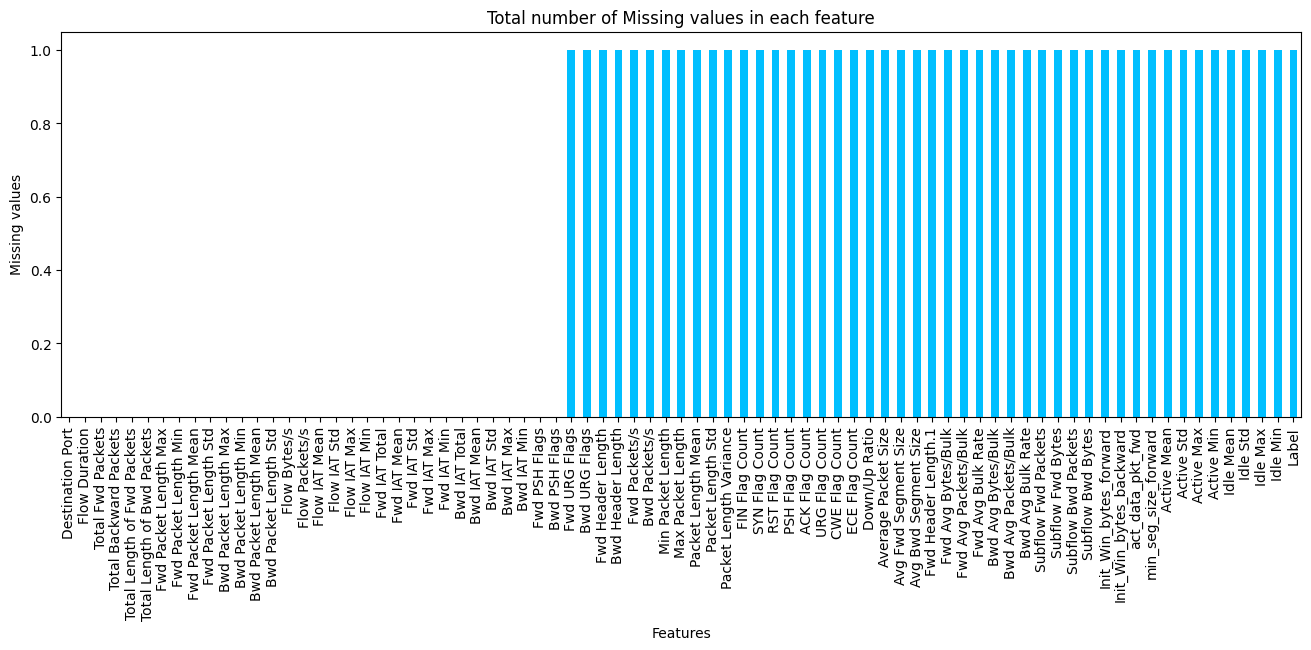

In [10]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    missing_values_flow_bytes = dataframe['Flow Bytes/s'].isnull().sum()
    print(f"Missing values in 'flow bytes/s': {missing_values_flow_bytes}")

    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar', color='deepskyblue')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [11]:
#drop the instances with null values
data_f = df.dropna()


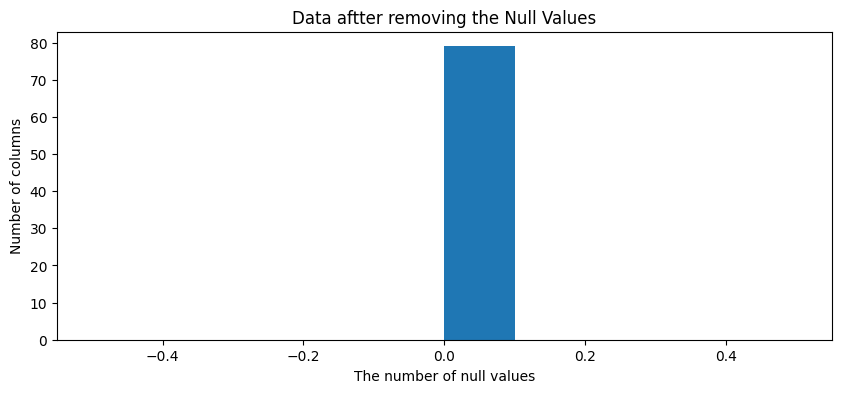

In [12]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

Label
DDoS      34952
BENIGN    31284
Name: count, dtype: int64


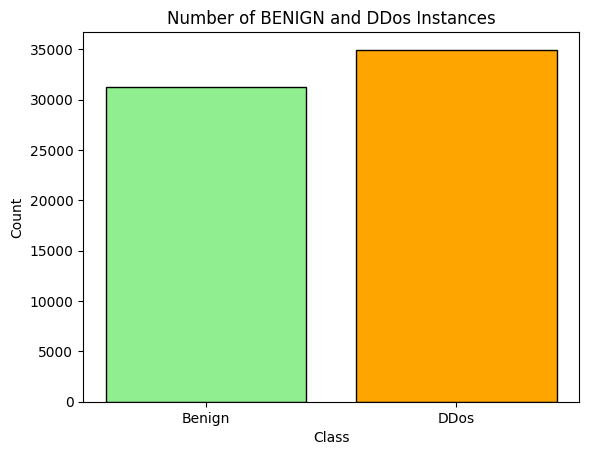

In [13]:
label_counts = df['Label'].value_counts()
print(label_counts)
count_benign = label_counts['BENIGN']
count_ddos = label_counts['DDoS']

plt.bar(['Benign', 'DDos'], [count_benign, count_ddos], color=['lightgreen', 'orange'],edgecolor='black')

# Adding the title and labels
plt.title('Number of BENIGN and DDos Instances')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

# **Data Virtualization**

In [14]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values
null_values

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [15]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

#describe the dataset
df.describe()

<ipython-input-15-423f8253901c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


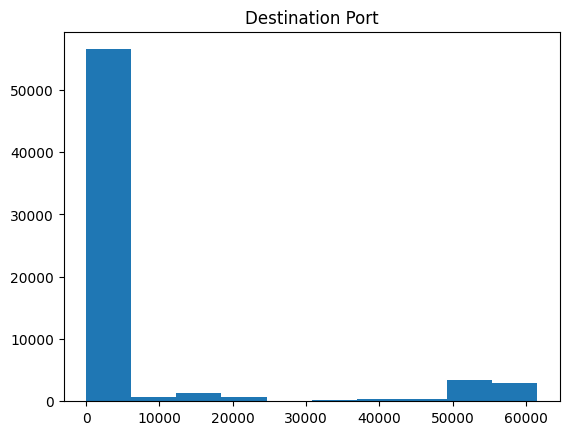

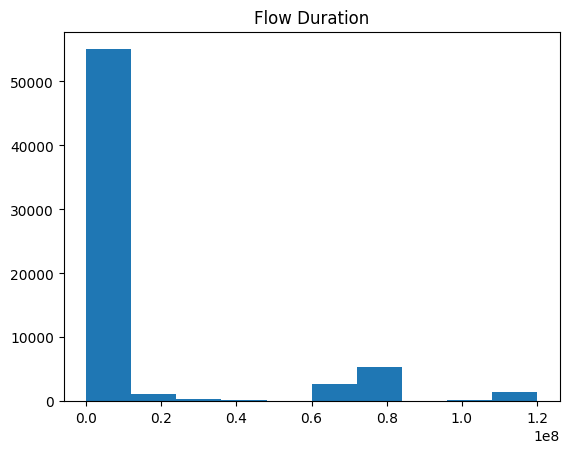

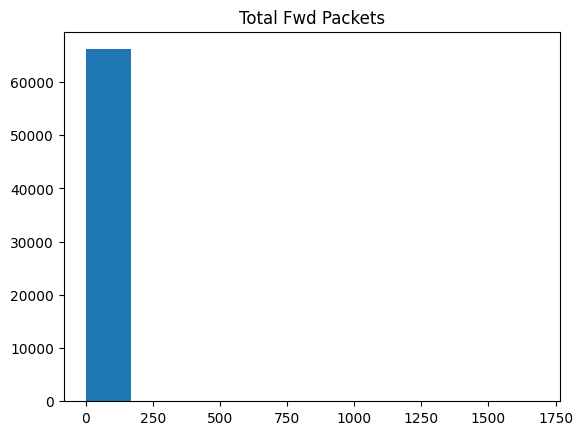

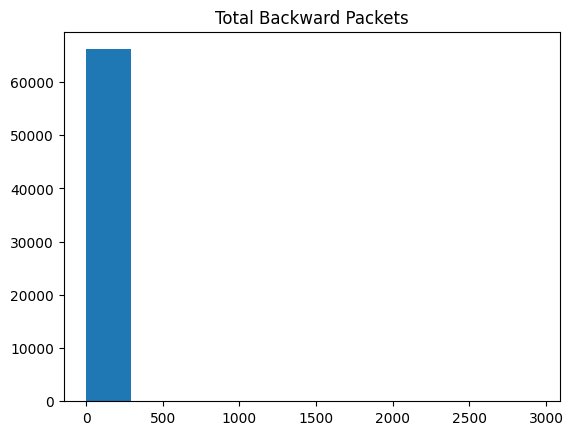

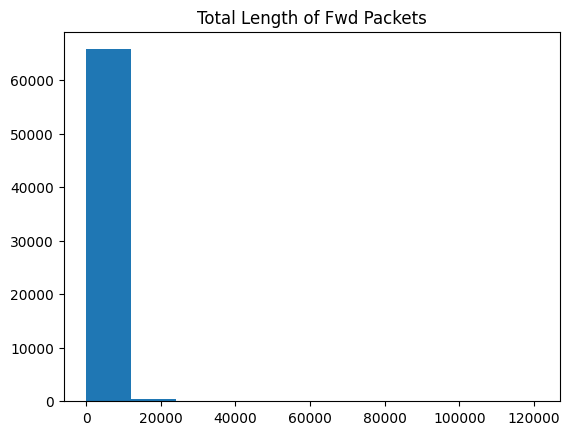

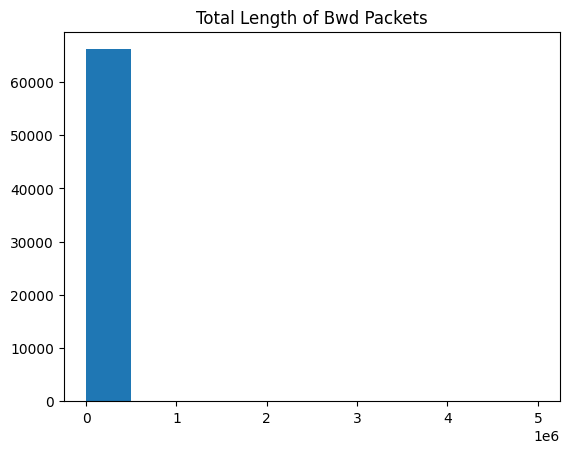

In [16]:
# Create a histogram plot for each feature
first_six_columns = data_f.iloc[:, :6]

plt.figure(5)
for col in first_six_columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

# **Data splitting into train and test**

In [17]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# **Training the Model**

##**Naive Baynes**

In [28]:
# Initialize the Naive Bayes classifier
nb= GaussianNB()

# Use cross_val_predict to get the predicted probabilities
y_scores = cross_val_predict(nb, X, y, method="predict_proba", cv=10)

# Calculate the ROC curve. Replace "2" with the appropriate positive label, e.g., 1 if your target labels are 0 and 1.
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1], pos_label=1)

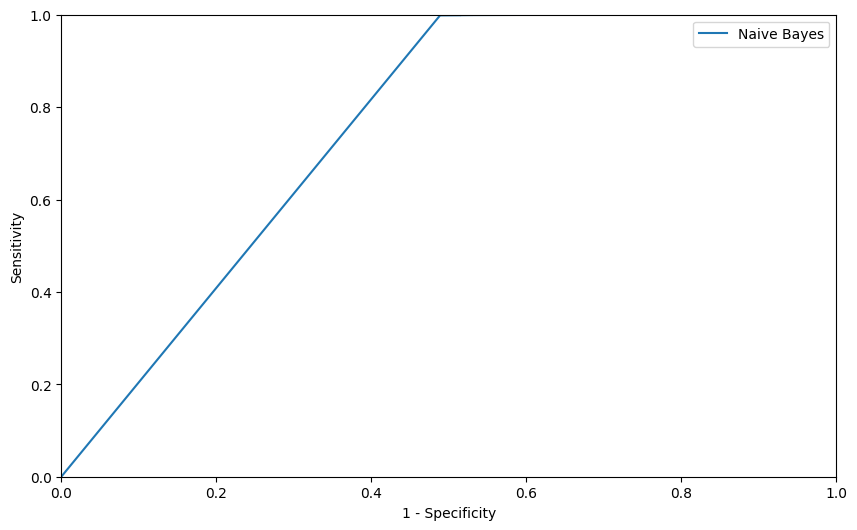

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="Naive Bayes")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

## **Neural Network**

In [30]:
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)

# Use cross_val_predict to get the predicted probabilities
y_scores2 = cross_val_predict(nn, X, y, method="predict_proba", cv=10)

# Calculate the ROC curve. Replace "2" with the appropriate positive label, e.g., 1 if your target labels are 0 and 1.
fpr2, tpr2, thresholds2 = roc_curve(y, y_scores2[:, 1], pos_label=1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

AUC score: 0.9728337294818614


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


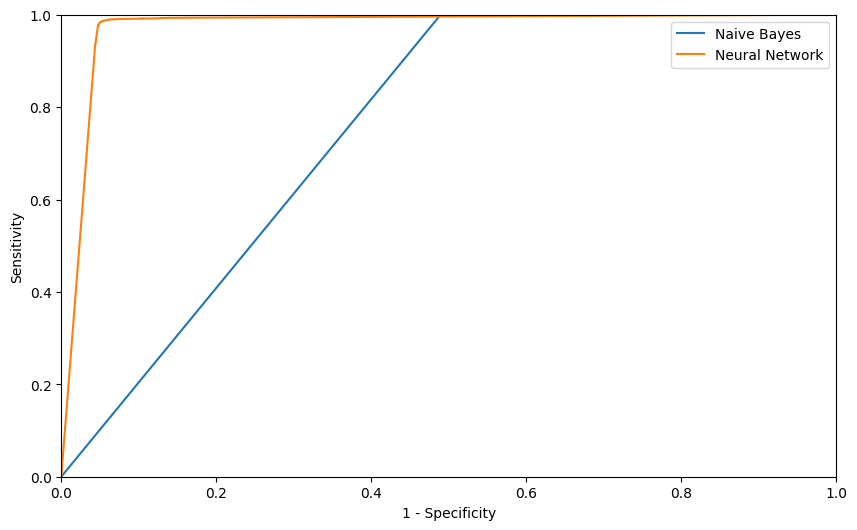

AUC score of nb: 0.7551234177105445
AUC score of nn: 0.9728337294818614


In [34]:
# plot the ROC cruve for two models
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="Naive Bayes")
plt.plot(fpr2, tpr2, label="Neural Network")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

#AUC
print("AUC score of nb: " + str(roc_auc_score(y, y_scores[:,1])))
print("AUC score of nn: " + str(roc_auc_score(y, y_scores2[:,1])))
